In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#seed = 42
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,auc, roc_curve
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,auc, roc_curve
pd.set_option('display.max_columns', 500) # default is 20
pd.set_option('display.max_rows',None)

In [2]:
data=pd.read_csv('C:/Users/John/Documents/Business mathematics/machine learning/project/taxi_trip_data.csv')

In [3]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138


In [4]:
data.shape

(10000000, 17)

Create a copy of the original dataset.

In [5]:
data_original=data.copy(deep=True)

Checking for nulls in the dataset

In [6]:
data.isnull().sum()

vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
dtype: int64

Check descriptive statistics

In [7]:
data.describe()

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.614328e+00,1.602949e+00,8.849280e+00,1.201239e+00,1.189299e+00,3.165255e+01,3.383781e-01,4.819289e-01,5.598527e+00,2.137918e+00,2.978831e-01,4.051607e+01,1.535632e+02,1.481428e+02
std,5.146576e-01,1.245782e+00,5.882028e+00,1.250733e+00,4.339876e-01,1.606011e+02,5.512911e-01,1.207282e-01,4.840596e+00,3.750309e+00,3.406027e-02,1.611634e+02,6.076456e+01,7.574853e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-8.000000e+02,-8.000000e+01,-5.000000e-01,-3.224200e+02,-5.250000e+01,-3.000000e-01,-8.003000e+02,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,5.820000e+00,1.000000e+00,1.000000e+00,2.350000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,2.906000e+01,1.320000e+02,8.800000e+01
50%,2.000000e+00,1.000000e+00,8.480000e+00,1.000000e+00,1.000000e+00,2.850000e+01,0.000000e+00,5.000000e-01,5.560000e+00,0.000000e+00,3.000000e-01,3.730000e+01,1.380000e+02,1.420000e+02
75%,2.000000e+00,2.000000e+00,1.110000e+01,1.000000e+00,1.000000e+00,3.700000e+01,5.000000e-01,5.000000e-01,7.960000e+00,5.760000e+00,3.000000e-01,4.906000e+01,1.860000e+02,2.290000e+02
max,4.000000e+00,9.000000e+00,7.655760e+03,9.900000e+01,5.000000e+00,3.984600e+05,8.400000e+01,1.500000e+02,4.960000e+02,9.182500e+02,1.000000e+00,3.985220e+05,2.650000e+02,2.650000e+02


In [8]:
data.describe(include=[object])

,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,10000000,10000000,10000000
unique,7824766,7823041,2
top,2018-03-10 00:12:00,2018-03-11 00:00:00,N
freq,12,45,9946277


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   vendor_id            int64  
 1   pickup_datetime      object 
 2   dropoff_datetime     object 
 3   passenger_count      int64  
 4   trip_distance        float64
 5   rate_code            int64  
 6   store_and_fwd_flag   object 
 7   payment_type         int64  
 8   fare_amount          float64
 9   extra                float64
 10  mta_tax              float64
 11  tip_amount           float64
 12  tolls_amount         float64
 13  imp_surcharge        float64
 14  total_amount         float64
 15  pickup_location_id   int64  
 16  dropoff_location_id  int64  
dtypes: float64(8), int64(6), object(3)
memory usage: 1.3+ GB


Pickup and Dropoff date times are being imported as objects->convert them into date times

In [10]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'],format='%Y %m %d')
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'],format='%Y %m %d')


check unique values per attribute

In [11]:
#number of unique values per attribute
data.nunique()

vendor_id                    3
pickup_datetime        7824766
dropoff_datetime       7823041
passenger_count             10
trip_distance             6502
rate_code                    7
store_and_fwd_flag           2
payment_type                 5
fare_amount               8286
extra                       61
mta_tax                     24
tip_amount                5919
tolls_amount              2463
imp_surcharge               12
total_amount             20933
pickup_location_id         262
dropoff_location_id        263
dtype: int64

Create new fetures from datetime->pickup/dropoff day,hour,month

In [12]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['pickup_month']=data['pickup_datetime'].dt.month
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['pickup_year']=data['pickup_datetime'].dt.year
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data['dropoff_month']=data['dropoff_datetime'].dt.month
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday
data['dropoff_year']=data['dropoff_datetime'].dt.year

In [13]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [14]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

Create the response variable: 1-If customer tipped , 0-If customer didn't tip

In [15]:
data['Tip Yes=1,No=0']=0

In [16]:
data['Tip Yes=1,No=0'] = np.where(data['tip_amount']>0, 1, 0)

In [17]:
#data['Tip Yes=1,No=0'].value_counts().plot(kind='bar')
number_of_tips=data['Tip Yes=1,No=0'].sum()

Apparently 78% of customers leave a tip

In [18]:
tip=[number_of_tips,len(data)]
tip_percentage=[data['Tip Yes=1,No=0'].sum()/len(data)*100,100-(data['Tip Yes=1,No=0'].sum()/len(data)*100)]
tip_percentage=pd.DataFrame(tip_percentage)
#creating a dataframe with tip percentages
print('Tip percentage is',data['Tip Yes=1,No=0'].sum()/len(data)*100)

Tip percentage is 78.68507


No handles with labels found to put in legend.


Text(0.5, 1.0, 'CUSTOMER TIP RATIO')

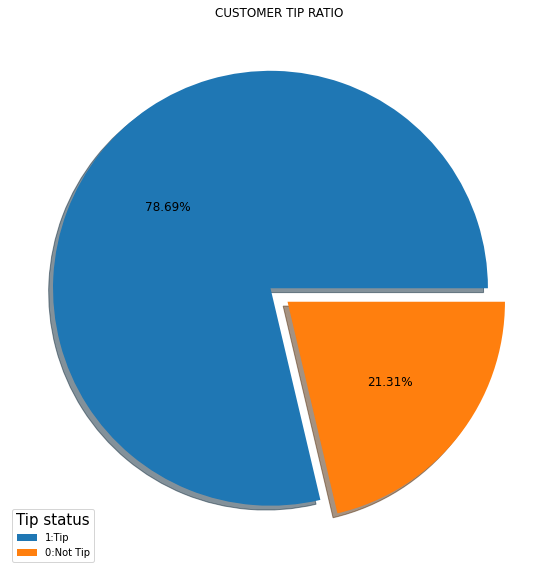

In [19]:
tip_percentage.plot(kind='pie', subplots=True, autopct='%1.2f%%', legend=True, fontsize=12, figsize=(15,10), textprops={'color':"black"},shadow=True,explode=(0.05, 0.05),labels=['',''])
plt.legend(["1:Tip","0:Not Tip"],title="Tip status", fontsize=10, title_fontsize=15)
plt.ylabel("")
plt.title('CUSTOMER TIP RATIO')

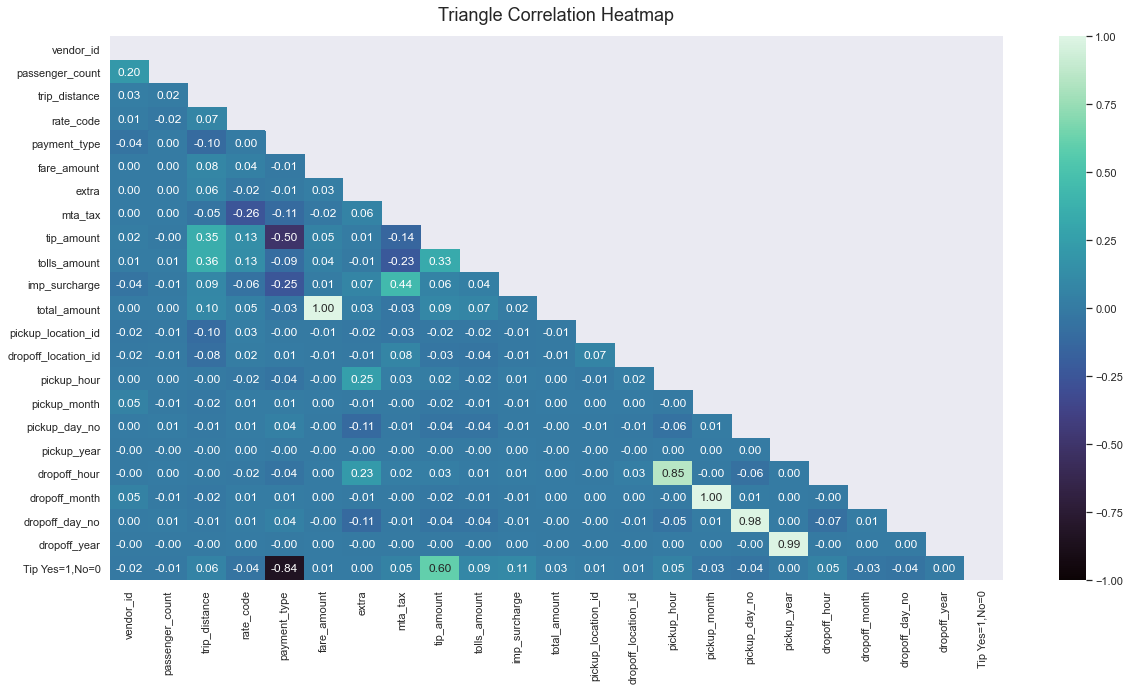

In [20]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(20,10)})
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='mako',fmt='.2f')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
#sns.set(rc = {'figure.figsize':(20,10)})
#sns.heatmap(data.corr(),cmap='mako',annot=True,vmin=-1, vmax=1,fmt='.2f')


In [21]:
#data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'],format='%Y %m %d')
#data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'],format='%Y %m %d')

In [22]:
data['Trip_Duration'] = data['dropoff_datetime'].sub(data['pickup_datetime'], axis=0)

(array([0, 1, 2]), [Text(0, 0, '2'), Text(1, 0, '1'), Text(2, 0, '4')])

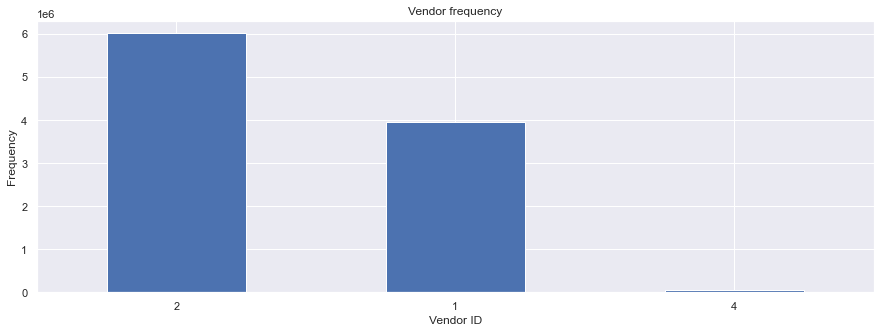

In [23]:
data['vendor_id'].value_counts().plot(kind='bar',figsize=(15,5),xlabel='Vendor ID',ylabel='Frequency',title='Vendor frequency')
plt.xticks(rotation=0)

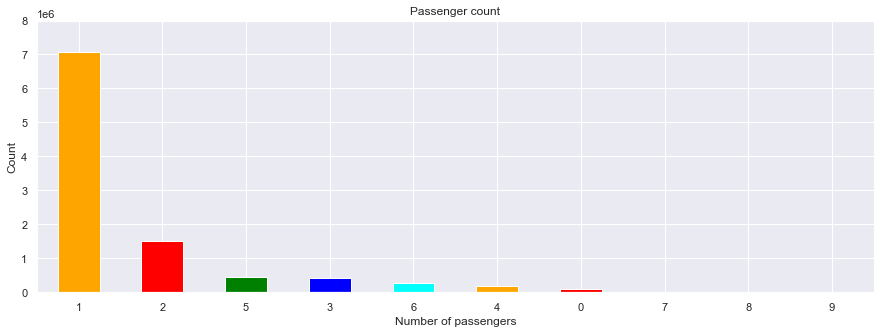

In [24]:
data['passenger_count'].value_counts().plot(kind='bar',figsize=(15,5),xlabel='Number of passengers',ylim=(0,8000000),ylabel='Count',title='Passenger count',color=['orange', 'red', 'green', 'blue','cyan'])
plt.xticks(rotation=0)
plt.show()

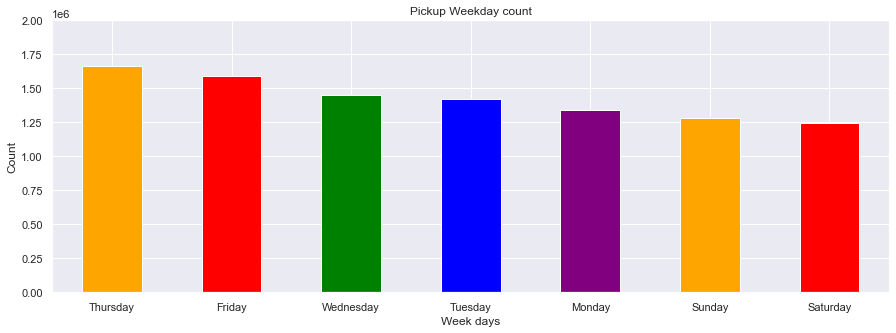

In [25]:
data['pickup_day'].value_counts().plot(kind='bar',figsize=(15,5),xlabel='Week days',ylim=(0,2000000),ylabel='Count',title='Pickup Weekday count',color=['orange', 'red', 'green', 'blue','purple'])
plt.xticks(rotation=0)
plt.show()

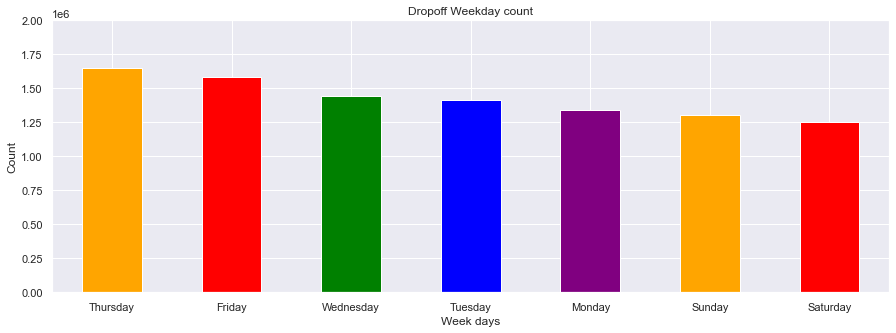

In [26]:
data['dropoff_day'].value_counts().plot(kind='bar',figsize=(15,5),xlabel='Week days',ylim=(0,2000000),ylabel='Count',title='Dropoff Weekday count',color=['orange', 'red', 'green', 'blue','purple'])
plt.xticks(rotation=0)
plt.show()

Pickup-dropoff day counts are the same.

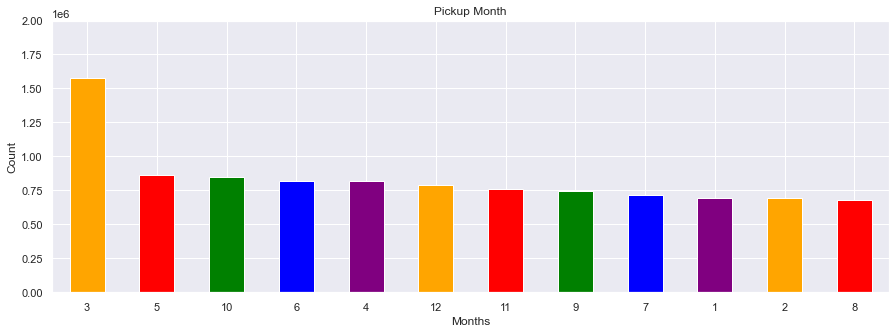

In [27]:
data['pickup_month'].value_counts().plot(kind='bar',figsize=(15,5),xlabel='Months',ylim=(0,2000000),ylabel='Count',title='Pickup Month',color=['orange', 'red', 'green', 'blue','purple'])
plt.xticks(rotation=0)
plt.show()

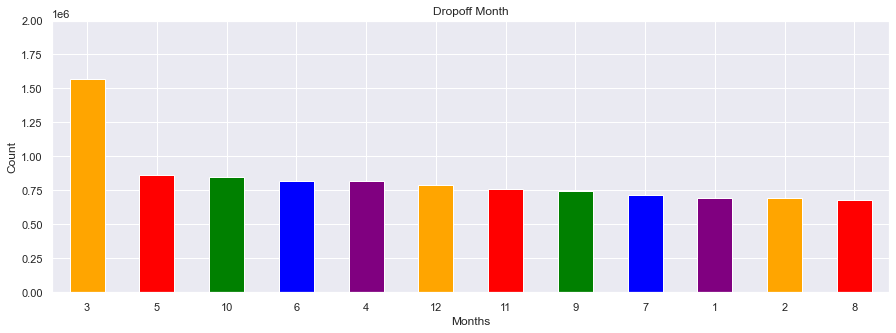

In [28]:
data['dropoff_month'].value_counts().plot(kind='bar',figsize=(15,5),xlabel='Months',ylim=(0,2000000),ylabel='Count',title='Dropoff Month',color=['orange', 'red', 'green', 'blue','purple'])
plt.xticks(rotation=0)
plt.show()

In [29]:
data['Trip_Duration']= np.array([data['Trip_Duration']], dtype = "datetime64[ns]")[0]
data['Trip_Duration_Minutes']=(data['Trip_Duration'].dt.hour)*60 + data['Trip_Duration'].dt.minute
data.drop(['Trip_Duration'], axis = 1,inplace=True)

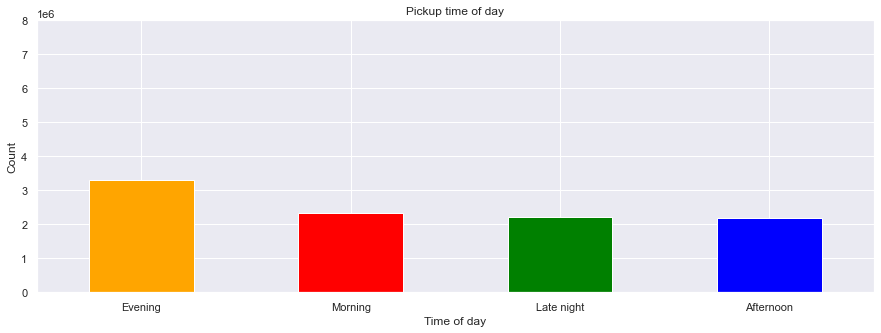

In [30]:
data['pickup_timeofday'].value_counts().plot(kind='bar',figsize=(15,5),xlabel='Time of day',ylim=(0,8000000),ylabel='Count',title='Pickup time of day',color=['orange', 'red', 'green', 'blue','purple'])
plt.xticks(rotation=0)
plt.show()

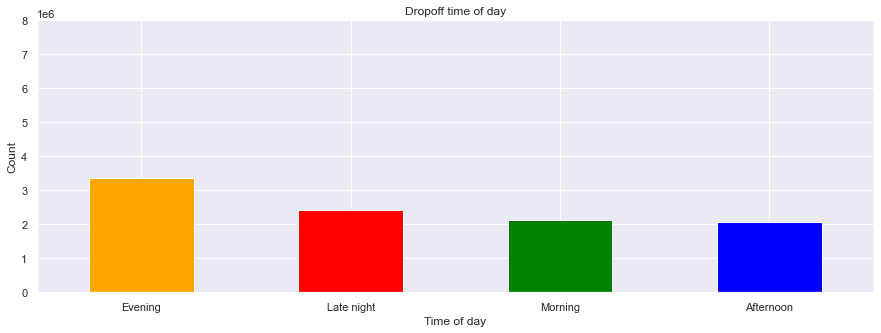

In [31]:
data['dropoff_timeofday'].value_counts().plot(kind='bar',figsize=(15,5),xlabel='Time of day',ylim=(0,8000000),ylabel='Count',title='Dropoff time of day',color=['orange', 'red', 'green', 'blue','purple'])
plt.xticks(rotation=0)
plt.show()

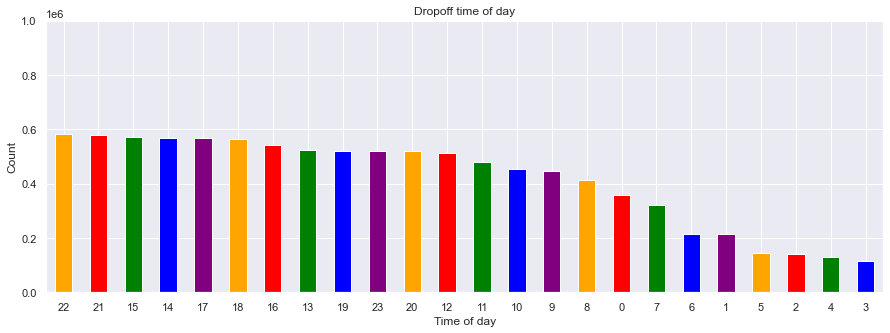

In [32]:
data['pickup_hour'].value_counts().plot(kind='bar',figsize=(15,5),xlabel='Time of day',ylim=(0,1000000),ylabel='Count',title='Dropoff time of day',color=['orange', 'red', 'green', 'blue','purple'])
plt.xticks(rotation=0)
plt.show()

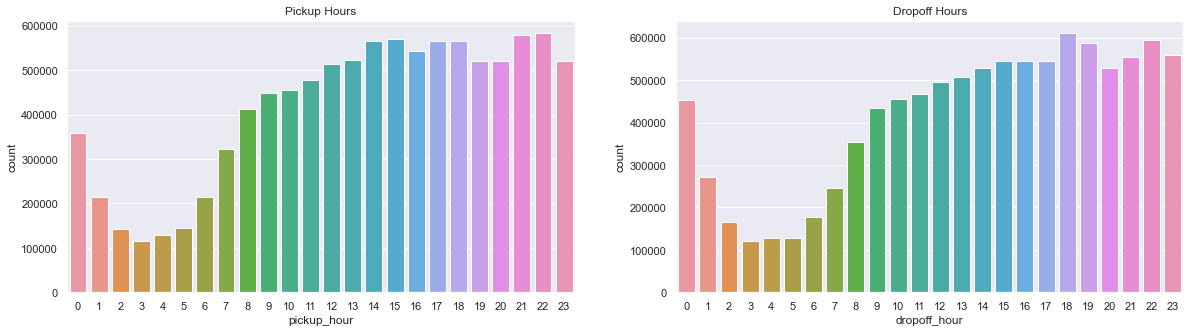

In [33]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Hours')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)
ax10.set_title('Dropoff Hours')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

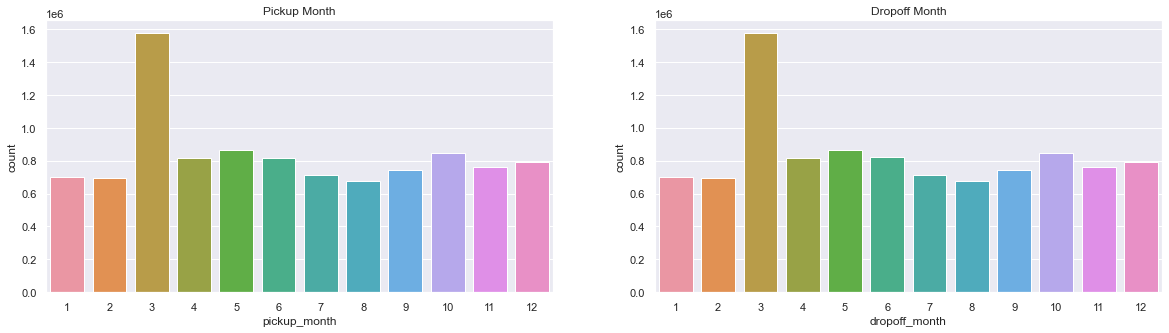

In [34]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

Exploratory analysis in relation to the response variable

In [35]:
tips_time=data.groupby('pickup_timeofday')['Tip Yes=1,No=0'].value_counts(1)#.plot(kind='bar')
tips_day=data.groupby('pickup_day')['Tip Yes=1,No=0'].value_counts(1)#.plot(kind='bar')

In [36]:
tips_time.head()

pickup_timeofday  Tip Yes=1,No=0
Afternoon         1                 0.775376
                  0                 0.224624
Evening           1                 0.799911
                  0                 0.200089
Late night        1                 0.772227
Name: Tip Yes=1,No=0, dtype: float64

In [37]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,pickup_day,pickup_hour,pickup_month,pickup_day_no,pickup_year,dropoff_day,dropoff_hour,dropoff_month,dropoff_day_no,dropoff_year,pickup_timeofday,dropoff_timeofday,"Tip Yes=1,No=0",Trip_Duration_Minutes
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1,Thursday,13,3,3,2018,Thursday,14,3,3,2018,Afternoon,Afternoon,1,39
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230,Thursday,13,3,3,2018,Thursday,14,3,3,2018,Afternoon,Afternoon,1,38
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231,Thursday,13,3,3,2018,Thursday,13,3,3,2018,Afternoon,Afternoon,1,1
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138,Thursday,13,3,3,2018,Thursday,14,3,3,2018,Afternoon,Afternoon,1,55
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138,Thursday,14,3,3,2018,Thursday,15,3,3,2018,Afternoon,Afternoon,1,60


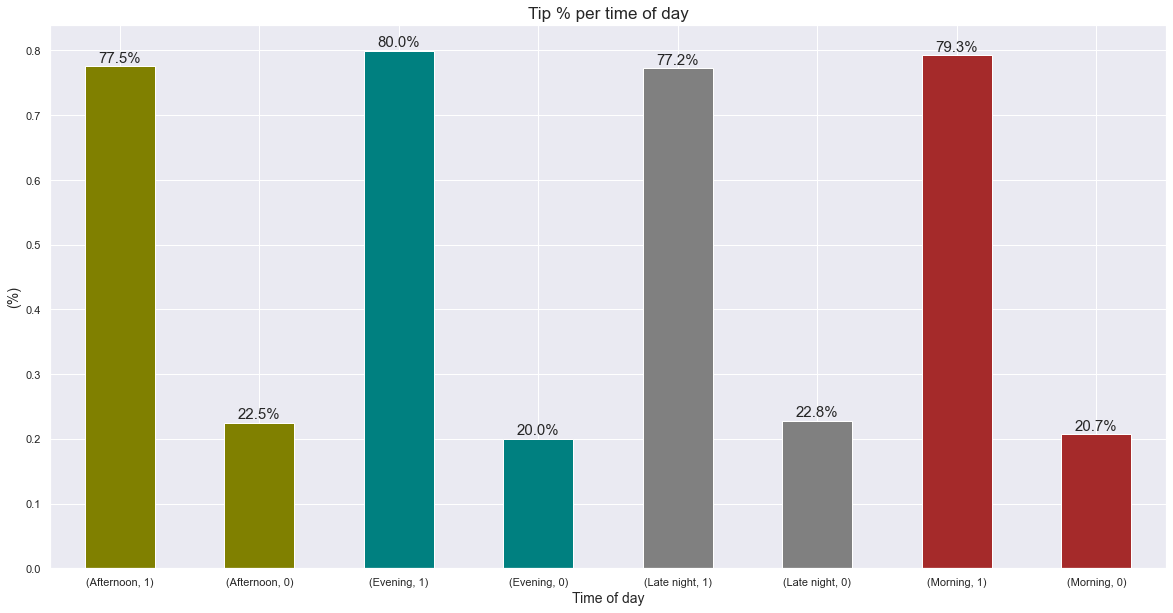

In [38]:
plots=tips_time.plot.bar(rot=0,color=['olive','olive', 'teal','teal','gray','gray','brown','brown'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1%'), #to .0f einai o ari8mos twn dekadikwn, p.x. gia 2 dekadika einai .2f
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Time of day', size=14)
plt.ylabel("(%)", size=14) 
plt.title("Tip % per time of day",size=17)
#plt.legend(['Tip','No Tip'])
plt.show()

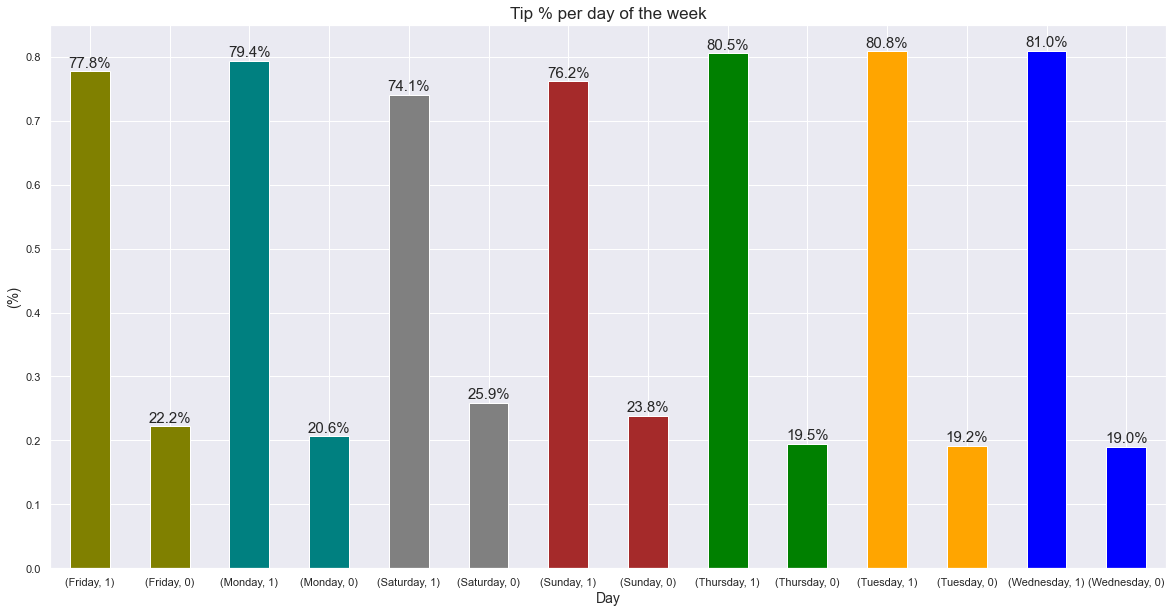

In [39]:
plots=tips_day.plot.bar(rot=0,color=['olive','olive', 'teal','teal','gray','gray','brown','brown','green','green','orange','orange','blue','blue'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1%'), #to .0f einai o ari8mos twn dekadikwn, p.x. gia 2 dekadika einai .2f
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Day', size=14)
plt.ylabel("(%)", size=14) 
plt.title("Tip % per day of the week",size=17)
#plt.legend(['Tip','No Tip'])
plt.show()

Functions to deal with outliers

In [40]:
def Fix_boxplot(Onoma_Stilis):
    # Dealing with the outliers through IQR score method
 Q1 = data[Onoma_Stilis].quantile(0.25)
 Q3 = data[Onoma_Stilis].quantile(0.75)
 IQR = Q3 - Q1
 data[Onoma_Stilis] = data[Onoma_Stilis][~((data[Onoma_Stilis] < (Q1 - 1.5 * IQR)) |(data[Onoma_Stilis] > (Q3 + 1.5 * IQR)))]
 print(data[Onoma_Stilis].describe())
 sns.boxplot(x=data[Onoma_Stilis], orient="h")

count    9.653945e+06
mean     2.920926e+01
std      1.300607e+01
min      0.000000e+00
25%      2.200000e+01
50%      2.900000e+01
75%      3.700000e+01
max      6.200000e+01
Name: Trip_Duration_Minutes, dtype: float64


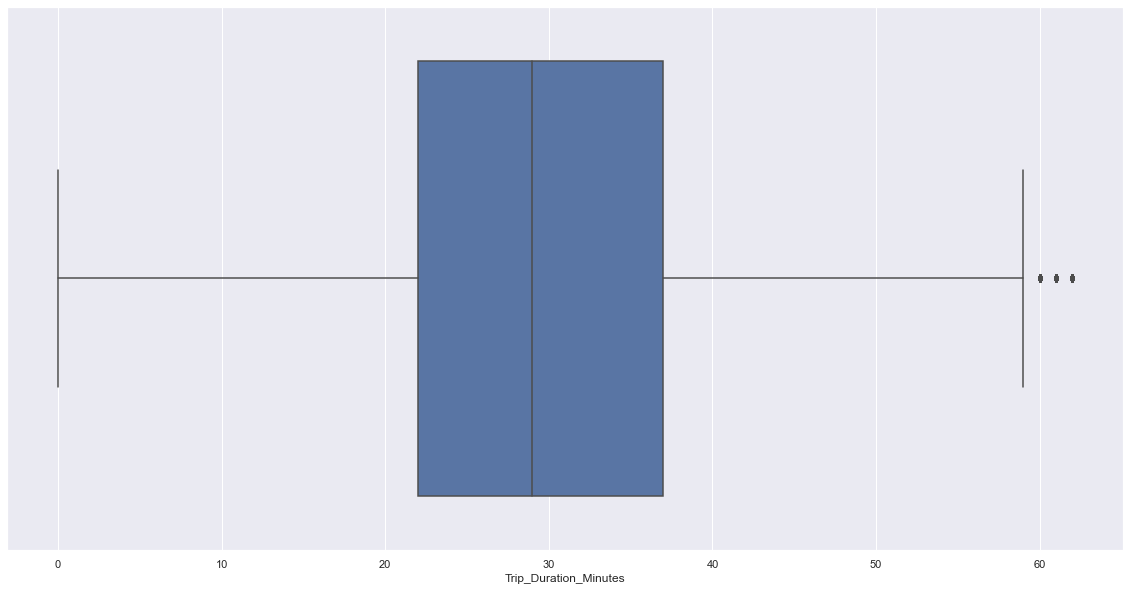

In [41]:
Fix_boxplot('Trip_Duration_Minutes')

In [42]:
def trip_length(x):
    if x in range(0,10):
        return '0-10'
    elif x in range(11,20):
        return '11-20'
    elif x in range(21,30):
        return '21-30'
    elif x in range(31,40):
        return '31-40'
    elif x in range(41,50):
        return '41-50'
    elif x in range(51,60):
        return '51-60'
    elif x in range(60,500):
        return '60+'
    #else:
        #return 'Late night'

In [43]:
data['trip_length']=data['Trip_Duration_Minutes'].apply(trip_length)

In [44]:
tip_trip_length=data.groupby('trip_length')['Tip Yes=1,No=0'].value_counts(1)#.plot(kind='bar')

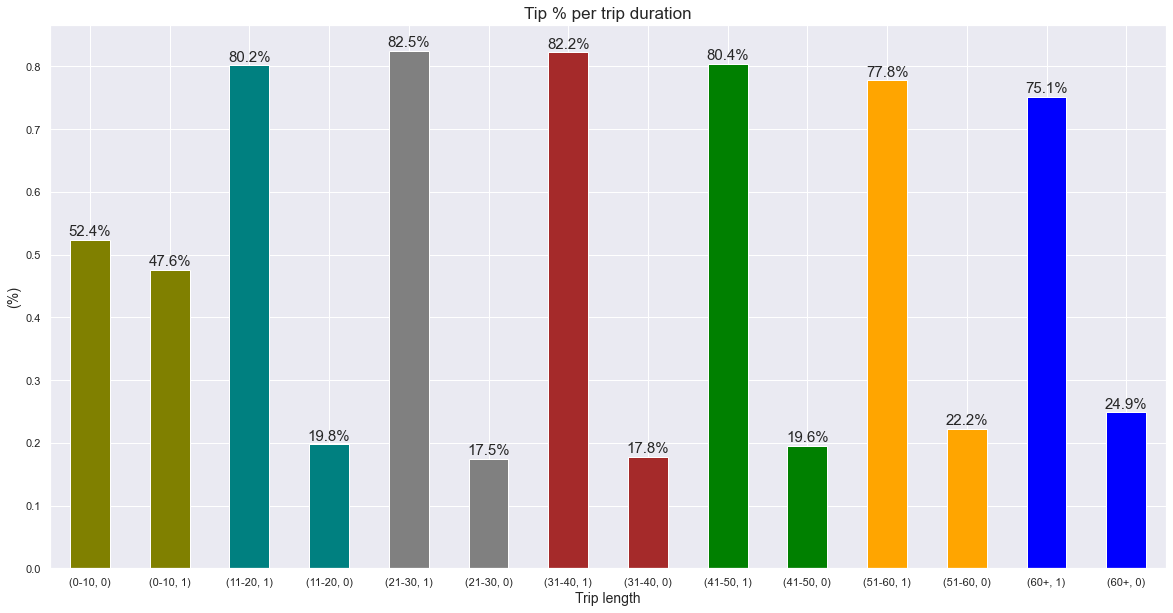

In [45]:
plots=tip_trip_length.plot.bar(rot=0,color=['olive','olive', 'teal','teal','gray','gray','brown','brown','green','green','orange','orange','blue','blue'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1%'), #to .0f einai o ari8mos twn dekadikwn, p.x. gia 2 dekadika einai .2f
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Trip length', size=14)
plt.ylabel("(%)", size=14) 
plt.title("Tip % per trip duration",size=17)
#plt.legend(['Tip','No Tip'])
plt.show()

In [46]:
tip_passengers=data.groupby('passenger_count')['Tip Yes=1,No=0'].value_counts(1)#.plot(kind='bar')

In [47]:
tip_passengers

passenger_count  Tip Yes=1,No=0
0                1                 0.761922
                 0                 0.238078
1                1                 0.792109
                 0                 0.207891
2                1                 0.777756
                 0                 0.222244
3                1                 0.760195
                 0                 0.239805
4                1                 0.723234
                 0                 0.276766
5                1                 0.791605
                 0                 0.208395
6                1                 0.787492
                 0                 0.212508
7                1                 0.690821
                 0                 0.309179
8                1                 0.737143
                 0                 0.262857
9                1                 0.770833
                 0                 0.229167
Name: Tip Yes=1,No=0, dtype: float64

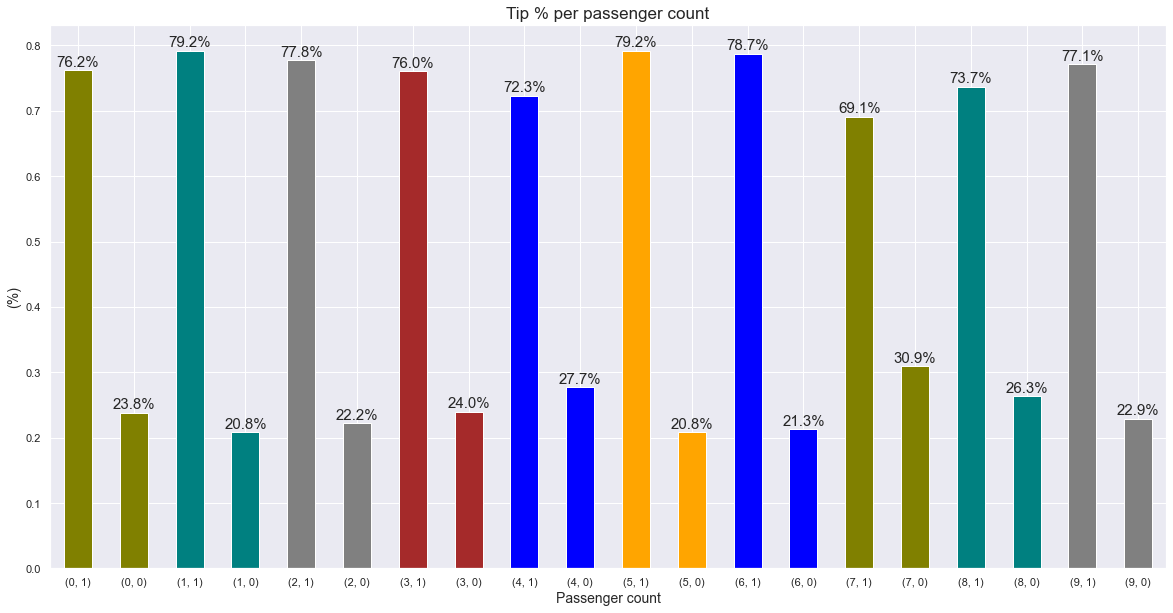

In [48]:
plots=tip_passengers.plot.bar(rot=0,color=['olive','olive', 'teal','teal','gray','gray','brown','brown','blue','blue','orange','orange','blue','blue'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1%'), #to .0f einai o ari8mos twn dekadikwn, p.x. gia 2 dekadika einai .2f
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Passenger count', size=14)
plt.ylabel("(%)", size=14) 
plt.title("Tip % per passenger count",size=17)
#plt.legend(['Tip','No Tip'])
plt.show()

In [49]:
tip_month=data.groupby('pickup_month')['Tip Yes=1,No=0'].value_counts(1)#.plot(kind='bar')

In [50]:
tip_month

pickup_month  Tip Yes=1,No=0
1             1                 0.795825
              0                 0.204175
2             1                 0.795369
              0                 0.204631
3             1                 0.805240
              0                 0.194760
4             1                 0.808078
              0                 0.191922
5             1                 0.797157
              0                 0.202843
6             1                 0.774046
              0                 0.225954
7             1                 0.743613
              0                 0.256387
8             1                 0.778323
              0                 0.221677
9             1                 0.803232
              0                 0.196768
10            1                 0.790203
              0                 0.209797
11            1                 0.797264
              0                 0.202736
12            1                 0.732147
              0             

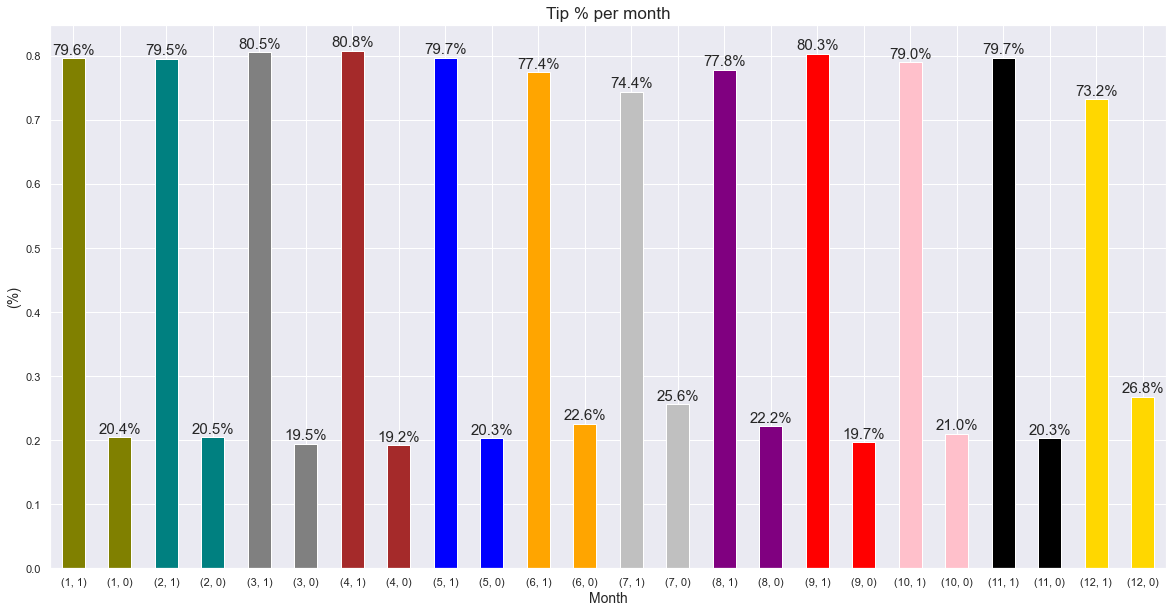

In [51]:
plots=tip_month.plot.bar(rot=0,color=['olive','olive', 'teal','teal','gray','gray','brown','brown','blue','blue','orange','orange','silver','silver','purple','purple','red','red','pink','pink','black','black','gold','gold'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1%'), #to .0f einai o ari8mos twn dekadikwn, p.x. gia 2 dekadika einai .2f
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Month', size=14)
plt.ylabel("(%)", size=14) 
plt.title("Tip % per month",size=17)
#plt.legend(['Tip','No Tip'])
plt.show()

DATA CLEANING

In [52]:
#data.drop(np.where(['dropoff_year']!=2018), axis = 1,inplace=True)

Remove all years except 2018

In [53]:
data = data[data['dropoff_year'] == 2018]

Remove negative tip amounts

In [54]:
data = data[data['tip_amount'] >=0]

Remove negative and zero fare amounts

In [55]:
data=data[data['fare_amount']>0]

In [56]:
data['passenger_count'].value_counts()

1    7030452
2    1502146
5     457309
3     414937
6     269282
4     193551
0      89750
7        207
8        174
9        144
Name: passenger_count, dtype: int64

In [57]:
data=data[data['passenger_count']<7]
data=data[data['passenger_count']!=0]

In [58]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,pickup_day,pickup_hour,pickup_month,pickup_day_no,pickup_year,dropoff_day,dropoff_hour,dropoff_month,dropoff_day_no,dropoff_year,pickup_timeofday,dropoff_timeofday,"Tip Yes=1,No=0",Trip_Duration_Minutes,trip_length
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1,Thursday,13,3,3,2018,Thursday,14,3,3,2018,Afternoon,Afternoon,1,39.0,31-40
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230,Thursday,13,3,3,2018,Thursday,14,3,3,2018,Afternoon,Afternoon,1,38.0,31-40
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231,Thursday,13,3,3,2018,Thursday,13,3,3,2018,Afternoon,Afternoon,1,1.0,0-10
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138,Thursday,13,3,3,2018,Thursday,14,3,3,2018,Afternoon,Afternoon,1,55.0,51-60
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138,Thursday,14,3,3,2018,Thursday,15,3,3,2018,Afternoon,Afternoon,1,60.0,60+


In [59]:
data=data[data['trip_distance']!=0]

In [60]:
data=data[data['tolls_amount']>=0]

In [61]:
data=data[data['extra']>=0]

In [62]:
data.isnull().sum().sort_values()

vendor_id                      0
Tip Yes=1,No=0                 0
dropoff_timeofday              0
pickup_timeofday               0
dropoff_year                   0
dropoff_day_no                 0
dropoff_month                  0
dropoff_hour                   0
dropoff_day                    0
pickup_year                    0
pickup_day_no                  0
pickup_month                   0
pickup_hour                    0
pickup_day                     0
dropoff_location_id            0
pickup_location_id             0
total_amount                   0
imp_surcharge                  0
tolls_amount                   0
tip_amount                     0
mta_tax                        0
extra                          0
fare_amount                    0
payment_type                   0
store_and_fwd_flag             0
rate_code                      0
trip_distance                  0
passenger_count                0
dropoff_datetime               0
pickup_datetime                0
Trip_Durat

Remove duplicates

In [63]:
data=data.drop_duplicates()

REMOVE OUTLIERS

In [64]:
def Start_boxplot(Onoma_Stilis):
 fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))
 index = 0
 sns.boxplot(x = data[Onoma_Stilis], orient="h")
 index += 1
 plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

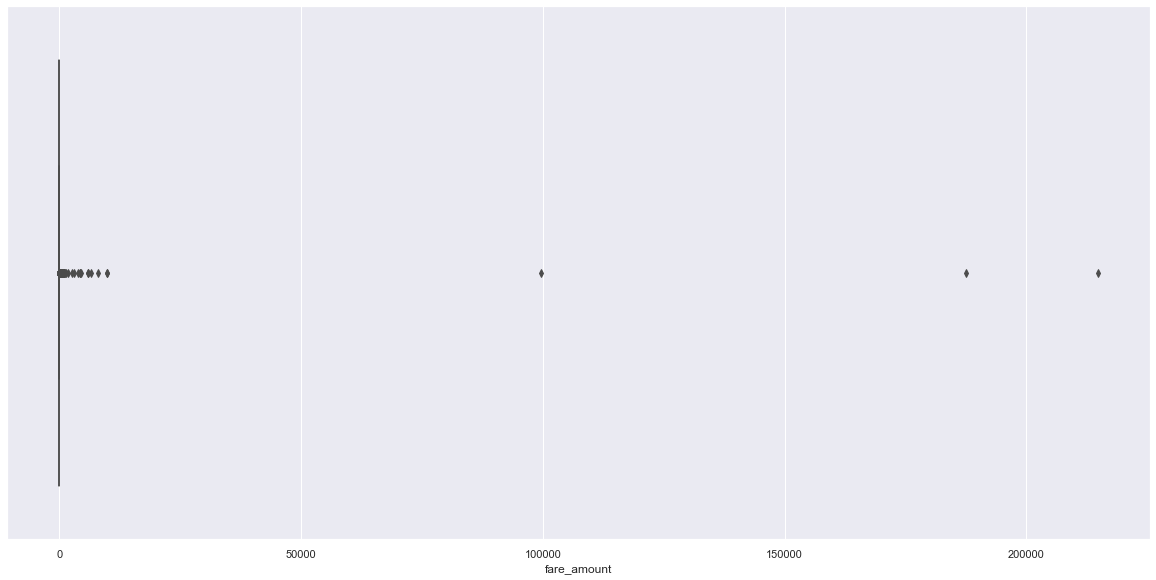

In [65]:
Start_boxplot('fare_amount')

count    8.329897e+06
mean     3.083867e+01
std      9.661597e+00
min      3.300000e+00
25%      2.400000e+01
50%      2.900000e+01
75%      3.600000e+01
max      5.725000e+01
Name: fare_amount, dtype: float64


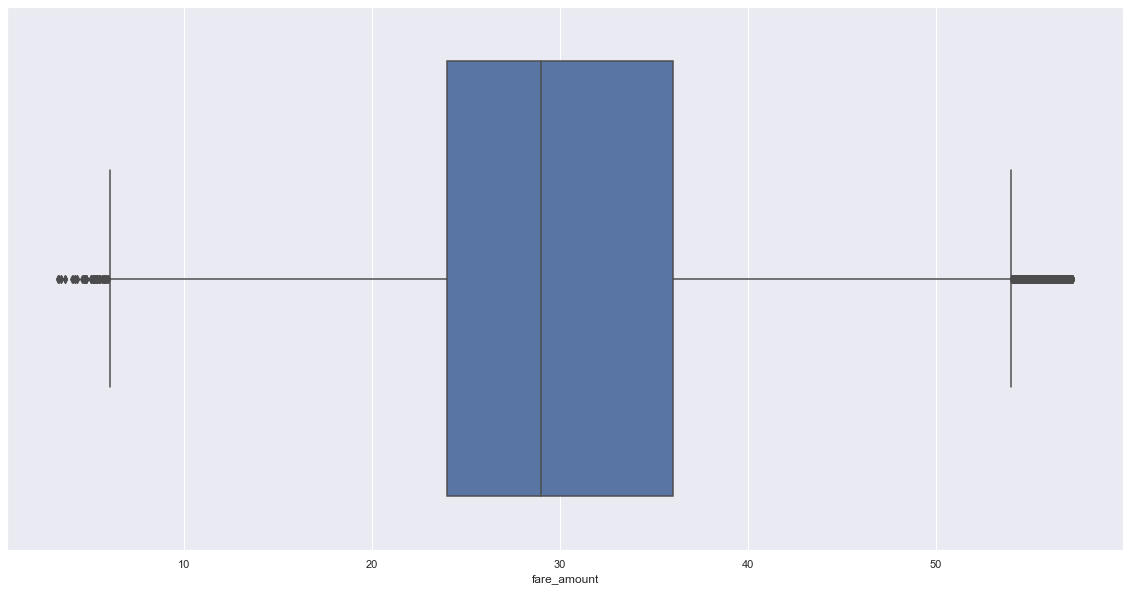

In [66]:
Fix_boxplot('fare_amount')

count    8.640265e+06
mean     8.518416e+00
std      4.065008e+00
min      1.000000e-02
25%      5.950000e+00
50%      8.400000e+00
75%      1.080000e+01
max      1.886000e+01
Name: trip_distance, dtype: float64


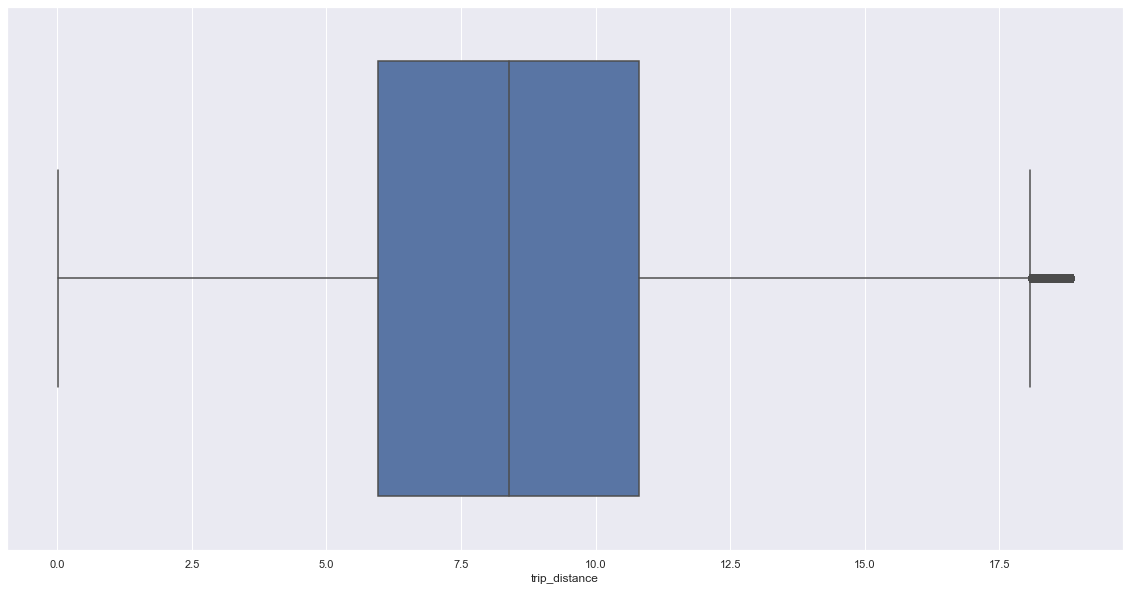

In [67]:
Fix_boxplot('trip_distance')

count    8.918319e+06
mean     1.994804e+00
std      2.890534e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.760000e+00
max      1.440000e+01
Name: tolls_amount, dtype: float64


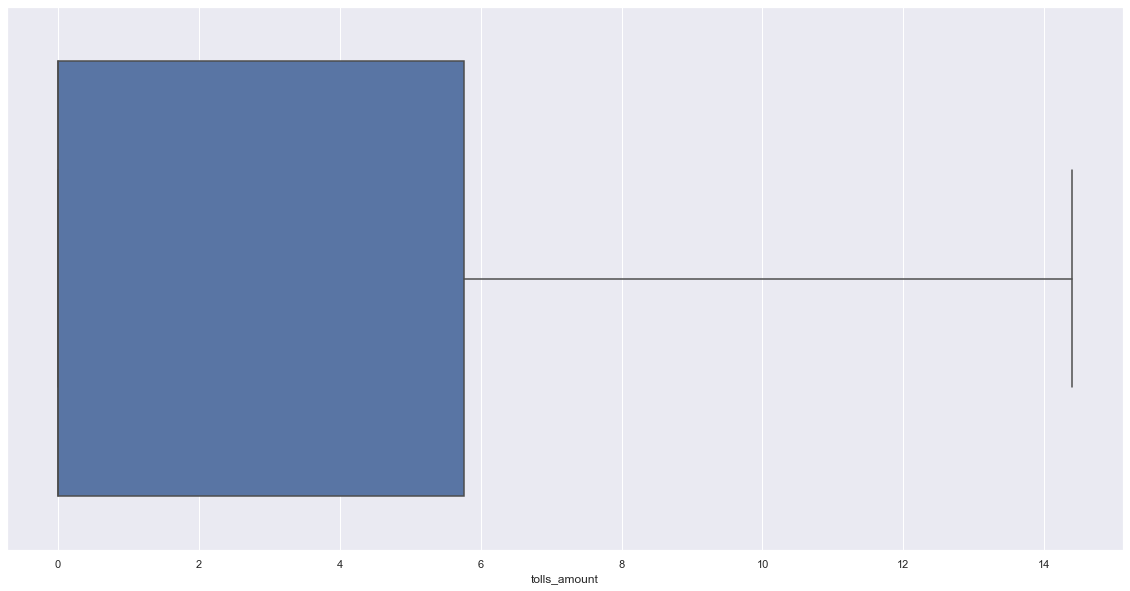

In [68]:
Fix_boxplot('tolls_amount')

count    8.729500e+06
mean     3.841630e+01
std      1.469261e+01
min      3.100000e-01
25%      2.910000e+01
50%      3.687000e+01
75%      4.756000e+01
max      7.865000e+01
Name: total_amount, dtype: float64


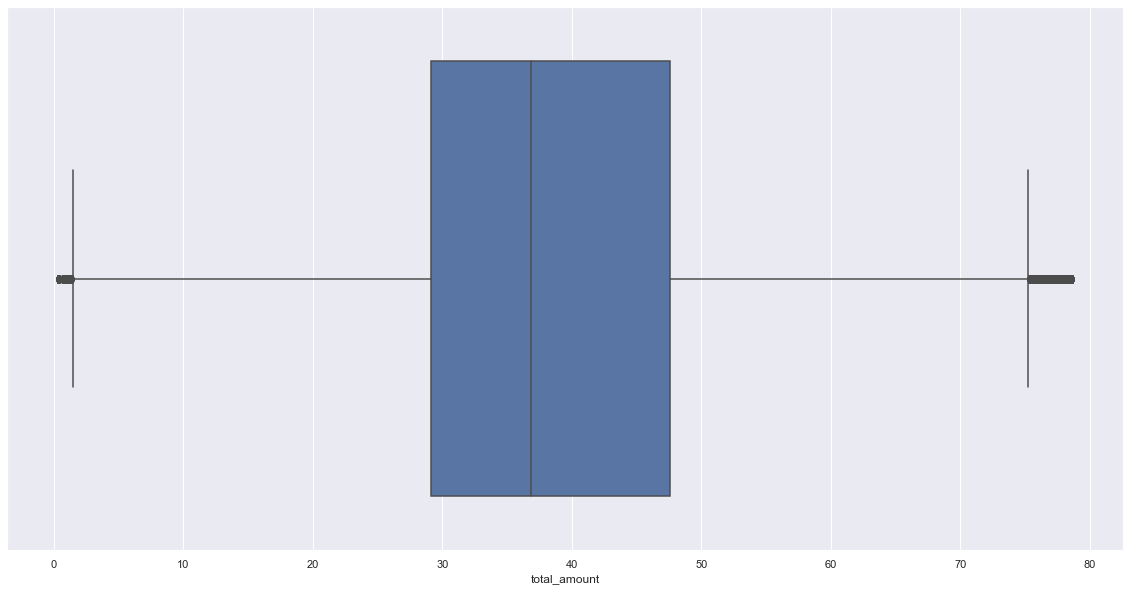

In [69]:
Fix_boxplot('total_amount')

count    8.230486e+06
mean     3.096378e+01
std      1.026954e+01
min      2.000000e+00
25%      2.300000e+01
50%      3.000000e+01
75%      3.700000e+01
max      5.800000e+01
Name: Trip_Duration_Minutes, dtype: float64


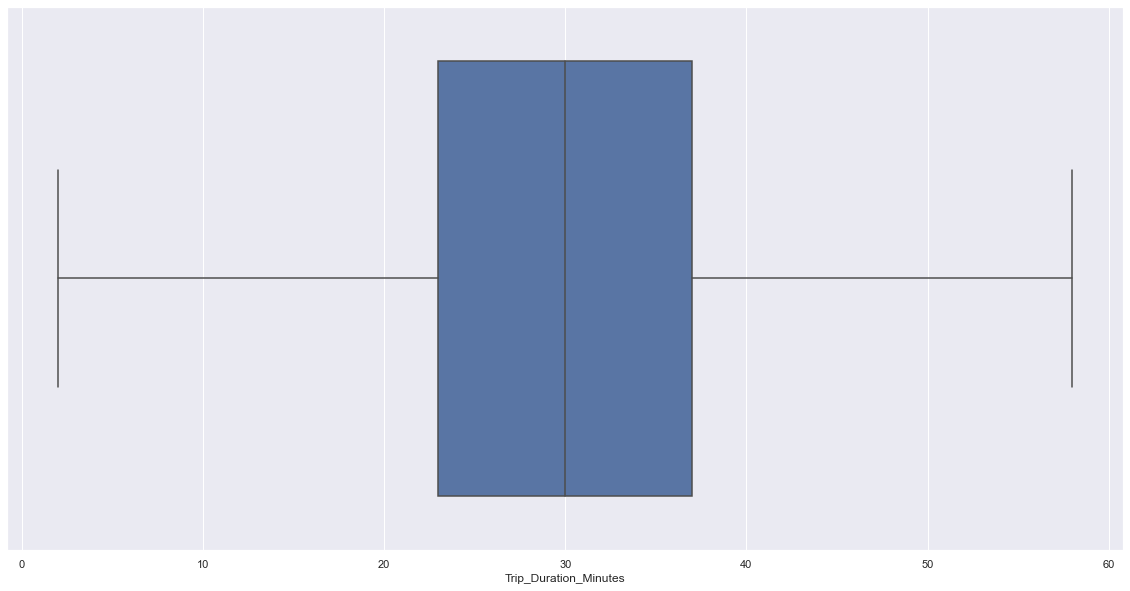

In [70]:
Fix_boxplot('Trip_Duration_Minutes')

Remove 'extreme' amounts of tips

In [71]:
data=data[data['tip_amount']<=20]

Drop nulls

In [72]:
len(data)

8958765

In [73]:
data.dropna(inplace=True)

In [74]:
data['Trip_Duration_Minutes'].dropna(inplace=True)

FEATURE ENGINEERING

Speed of trip

In [75]:
data['trip_speed']=data['trip_distance']/data['Trip_Duration_Minutes']

create variable : trip<10 , yes=1 , no=0

In [76]:
def minute_trip(x):
    if x in range(0,10):
        return 1
    else:
        return 0

In [77]:
data['10_min_trip']=data['Trip_Duration_Minutes'].apply(minute_trip)

In [78]:
data['10_min_trip'].value_counts()

0    6998666
1      37807
Name: 10_min_trip, dtype: int64

In [79]:
#d_matrix.isnull().sum()

Ορίζουμε τον πίνακα σχεδιασμού που θα δώσουμε στον αλγόριθμο, ως το αντίγραφο του αρχικού data.

In [80]:
d_matrix=data.copy(deep=True)

reset index of d_matrix

In [81]:
d_matrix=d_matrix.reset_index()

Choose the variables to include with the design matrix

In [82]:
#d_matrix.drop(d_matrix.columns.difference(['passenger_count','trip_distance','payment_type','tip_amount','tolls_amount','total_amount','pickup_location_id','dropoff_location_id','pickup_day_no','pickup_hour','dropoff_timeofday','Trip_Duration_Minutes','Tip Yes=1,No=0']),1,inplace=True)

In [83]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,pickup_day,pickup_hour,pickup_month,pickup_day_no,pickup_year,dropoff_day,dropoff_hour,dropoff_month,dropoff_day_no,dropoff_year,pickup_timeofday,dropoff_timeofday,"Tip Yes=1,No=0",Trip_Duration_Minutes,trip_length,trip_speed,10_min_trip
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230,Thursday,13,3,3,2018,Thursday,14,3,3,2018,Afternoon,Afternoon,1,38.0,31-40,0.120789,0
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138,Thursday,13,3,3,2018,Thursday,14,3,3,2018,Afternoon,Afternoon,1,55.0,51-60,0.308545,0
6,1,2018-03-29 14:09:41,2018-03-29 14:36:29,1,5.80,1,N,1,24.0,0.0,0.5,4.95,0.00,0.3,29.75,100,87,Thursday,14,3,3,2018,Thursday,14,3,3,2018,Afternoon,Afternoon,1,26.0,21-30,0.223077,0
7,2,2018-03-29 15:21:42,2018-03-29 16:04:16,1,3.38,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,144,161,Thursday,15,3,3,2018,Thursday,16,3,3,2018,Afternoon,Evening,1,42.0,41-50,0.080476,0
10,1,2018-03-29 16:27:00,2018-03-29 17:10:05,1,5.10,1,N,1,26.5,1.0,0.5,5.65,0.00,0.3,33.95,186,33,Thursday,16,3,3,2018,Thursday,17,3,3,2018,Evening,Evening,1,43.0,41-50,0.118605,0


Διαλέγουμε τα στοιχεία που θα κρατήσουμε στον πίνακα σχεδιασμού

In [84]:
d_matrix.drop(d_matrix.columns.difference(['passenger_count','tolls_amount','total_amount','pickup_day_no','pickup_hour','dropoff_timeofday','Trip_Duration_Minutes','Tip Yes=1,No=0','trip_speed','10_min_trip']),1,inplace=True)

In [85]:
d_matrix.head()

,passenger_count,tolls_amount,total_amount,pickup_hour,pickup_day_no,dropoff_timeofday,"Tip Yes=1,No=0",Trip_Duration_Minutes,trip_speed,10_min_trip
0,1,0.00,30.96,13,3,Afternoon,1,38.0,0.120789,0
1,2,5.76,61.67,13,3,Afternoon,1,55.0,0.308545,0
2,1,0.00,29.75,14,3,Afternoon,1,26.0,0.223077,0
3,1,0.00,30.96,15,3,Evening,1,42.0,0.080476,0
4,1,0.00,33.95,16,3,Evening,1,43.0,0.118605,0


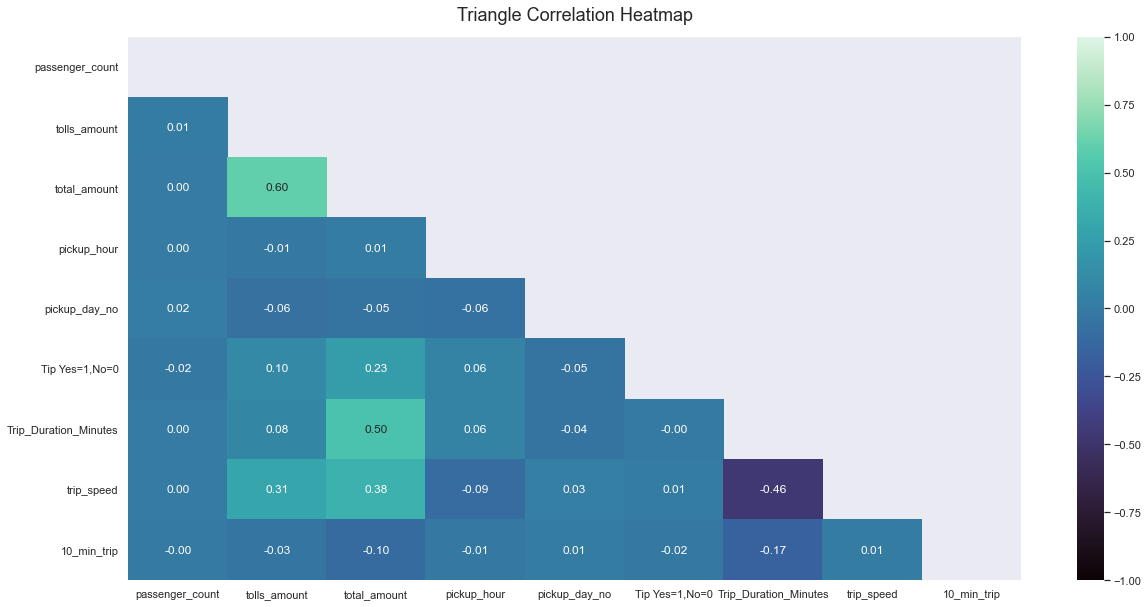

In [86]:
mask = np.triu(np.ones_like(d_matrix.corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(20,10)})
heatmap = sns.heatmap(d_matrix.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='mako',fmt='.2f')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [87]:
from sklearn.preprocessing import OneHotEncoder

In [88]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [89]:
encoder_df = pd.DataFrame(encoder.fit_transform(d_matrix[['dropoff_timeofday']]).toarray())

In [90]:
encoder_df.value_counts()

0    1    2    3  
0.0  1.0  0.0  0.0    2322515
     0.0  1.0  0.0    1754813
          0.0  1.0    1489607
1.0  0.0  0.0  0.0    1469538
dtype: int64

In [91]:
d_matrix['dropoff_timeofday'].value_counts()

Evening       2322515
Late night    1754813
Morning       1489607
Afternoon     1469538
Name: dropoff_timeofday, dtype: int64

In [92]:
d_matrix = d_matrix.join(encoder_df)

In [93]:
len(encoder_df)

7036473

In [94]:
len(d_matrix)

7036473

In [95]:
d_matrix.isna().sum()

passenger_count          0
tolls_amount             0
total_amount             0
pickup_hour              0
pickup_day_no            0
dropoff_timeofday        0
Tip Yes=1,No=0           0
Trip_Duration_Minutes    0
trip_speed               0
10_min_trip              0
0                        0
1                        0
2                        0
3                        0
dtype: int64

Delete categorical attribute

In [96]:
d_matrix.drop(['dropoff_timeofday'],axis=1,inplace=True)

In [97]:
d_matrix.head()

,passenger_count,tolls_amount,total_amount,pickup_hour,pickup_day_no,"Tip Yes=1,No=0",Trip_Duration_Minutes,trip_speed,10_min_trip,0,1,2,3
0,1,0.00,30.96,13,3,1,38.0,0.120789,0,1.0,0.0,0.0,0.0
1,2,5.76,61.67,13,3,1,55.0,0.308545,0,1.0,0.0,0.0,0.0
2,1,0.00,29.75,14,3,1,26.0,0.223077,0,1.0,0.0,0.0,0.0
3,1,0.00,30.96,15,3,1,42.0,0.080476,0,0.0,1.0,0.0,0.0
4,1,0.00,33.95,16,3,1,43.0,0.118605,0,0.0,1.0,0.0,0.0


In [98]:
d_matrix.dropna(inplace=True)

MODEL BUILDING

Since the dataset is too large and the algorithms will take too long to train , we will take a random sample from the dataset while  keeping the ratio of the classes the same.

In [99]:
d_matrix['Tip Yes=1,No=0'].value_counts()

1    5706860
0    1329613
Name: Tip Yes=1,No=0, dtype: int64

We will use 5% of original data which is approximately 350.000 entries

In [100]:
d_matrix['Tip Yes=1,No=0'].value_counts(1)

1    0.81104
0    0.18896
Name: Tip Yes=1,No=0, dtype: float64

In [101]:
d_matrix_2=d_matrix.sample(frac=0.05)

In [102]:
len(d_matrix_2)

351824

In [103]:
d_matrix_2['Tip Yes=1,No=0'].value_counts(1)

1    0.810203
0    0.189797
Name: Tip Yes=1,No=0, dtype: float64

LOGISTIC REGRESSION

Perform train-test split. We split the data into 80% to train the model and then use the remaining 20% to test the model with unknown data.

In [104]:
train_set_lr, test_set_lr = train_test_split(d_matrix_2, test_size = 0.2)# ,random_state = seed)
X_train_lr = train_set_lr.drop(['Tip Yes=1,No=0'], axis = 1)
y_train_lr = train_set_lr['Tip Yes=1,No=0']
X_test_lr = test_set_lr.drop(['Tip Yes=1,No=0'], axis = 1)
y_test_lr = test_set_lr['Tip Yes=1,No=0']


Undersampling

In [105]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train, y_train = rus.fit_resample(X_train_lr, y_train_lr)

c:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [106]:
scaler_lr = MinMaxScaler()
features_names = X_train_lr.columns
X_train_lr = scaler_lr.fit_transform(X_train_lr)
X_train_lr = pd.DataFrame(X_train_lr, columns = features_names)
X_test_lr = scaler_lr.transform(X_test_lr)
X_test_lr = pd.DataFrame(X_test_lr, columns = features_names)

c:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [107]:
classifier=LogisticRegression(random_state=0,max_iter=1000)
classifier.fit(X_train_lr,y_train_lr)

c:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=1000, random_state=0)

In [108]:
y_pred=classifier.predict(X_test_lr)

c:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Metrics

In [109]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_lr,y_pred)
cm

array([[ 5393,  8030],
       [  908, 56034]], dtype=int64)

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test_lr, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55     13423
           1       0.87      0.98      0.93     56942

    accuracy                           0.87     70365
   macro avg       0.87      0.69      0.74     70365
weighted avg       0.87      0.87      0.85     70365



c:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


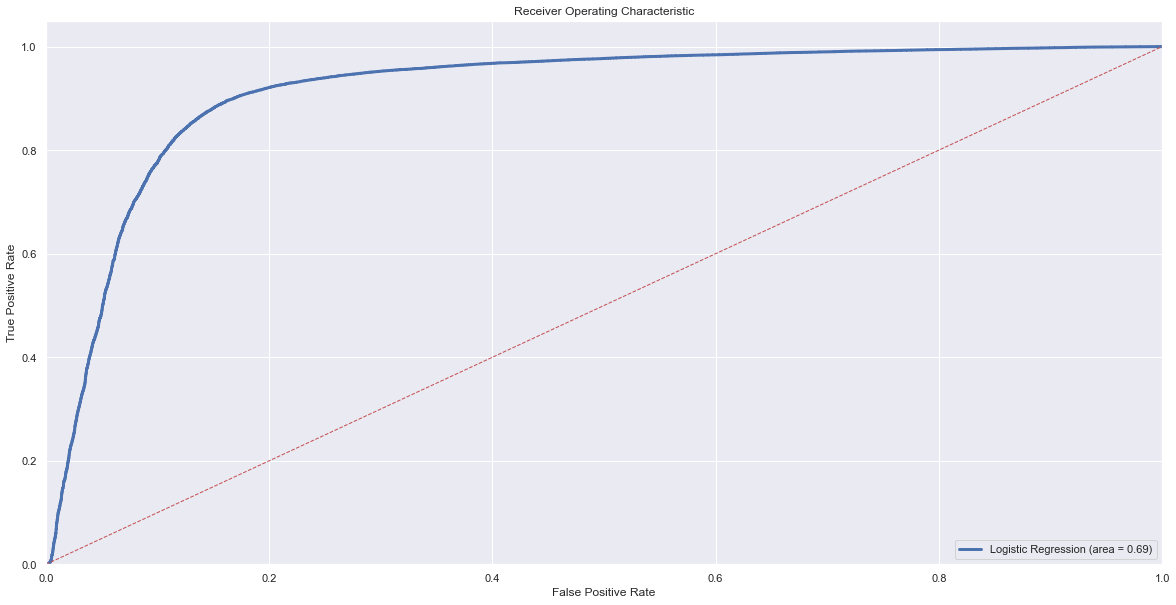

In [111]:
logit_roc_auc = metrics.roc_auc_score(y_test_lr, y_pred)
y_pred_prob_log=classifier.predict_proba(X_test_lr)
fpr, tpr, thresholds = metrics.roc_curve(y_test_lr, y_pred_prob_log[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc,lw=3)
plt.plot([0, 1], [0, 1],'r--',lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [112]:
importance = classifier.coef_[0]

Feature importance for logistic regression. Values near zero mean less important features.

In [113]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.19991
Feature: 1, Score: -5.75488
Feature: 2, Score: 25.32177
Feature: 3, Score: 0.39375
Feature: 4, Score: -0.22147
Feature: 5, Score: -16.44434
Feature: 6, Score: -130.13936
Feature: 7, Score: -0.22766
Feature: 8, Score: 0.00252
Feature: 9, Score: -0.02722
Feature: 10, Score: -0.19277
Feature: 11, Score: 0.16000


In [114]:
X_train_lr.head()

,passenger_count,tolls_amount,total_amount,pickup_hour,pickup_day_no,Trip_Duration_Minutes,trip_speed,10_min_trip,0,1,2,3
0,0.0,0.000000,0.410118,0.043478,0.500000,0.446429,0.036277,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000000,0.150936,0.391304,0.000000,0.428571,0.011464,0.0,0.0,0.0,0.0,1.0
2,0.0,0.409673,0.585586,0.826087,0.333333,0.517857,0.041619,0.0,0.0,1.0,0.0,0.0
3,0.0,0.000000,0.268746,0.826087,0.666667,0.589286,0.016365,0.0,0.0,1.0,0.0,0.0
4,0.0,0.000000,0.275676,0.956522,0.166667,0.214286,0.062989,0.0,0.0,0.0,1.0,0.0


RANDOM FOREST

In [115]:
clf = RandomForestClassifier(n_estimators = 20)

Fit the model to the training data

In [116]:
clf.fit(X_train_lr, y_train_lr)

c:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(n_estimators=20)

Make the predictions using the trained model, using the test data

In [117]:
y_pred_random_forest = clf.predict(X_test_lr)

c:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [118]:
print(classification_report(y_test_lr, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     13423
           1       0.97      0.98      0.98     56942

    accuracy                           0.97     70365
   macro avg       0.95      0.94      0.94     70365
weighted avg       0.97      0.97      0.97     70365



c:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


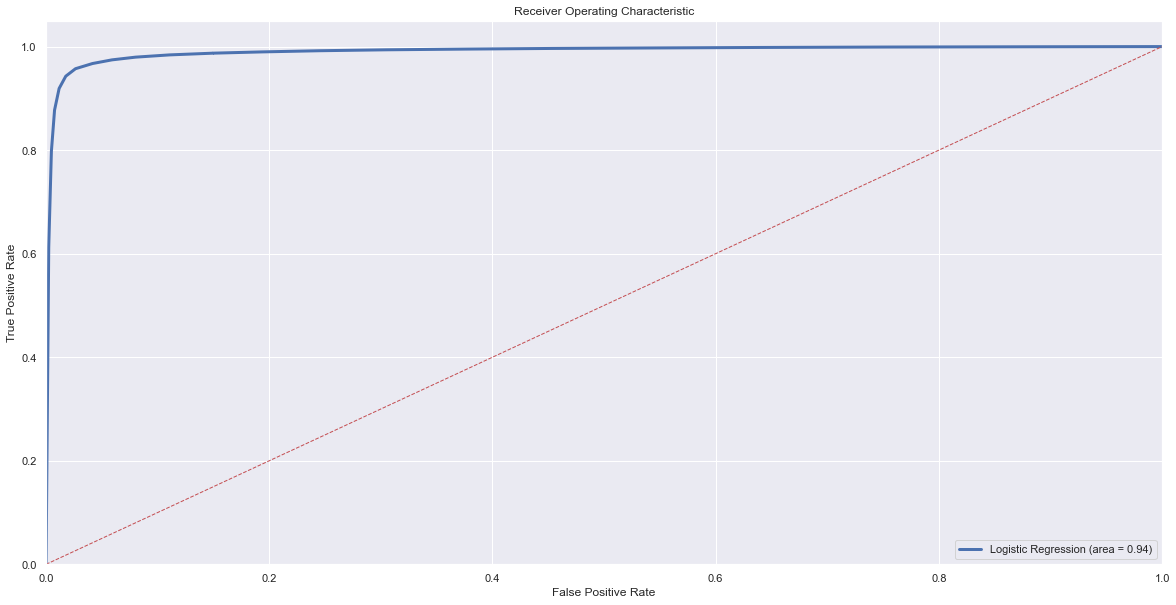

In [120]:
logit_roc_auc = metrics.roc_auc_score(y_test_lr, y_pred_random_forest)
y_pred_prob_log=clf.predict_proba(X_test_lr)
fpr, tpr, thresholds = metrics.roc_curve(y_test_lr, y_pred_prob_log[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc,lw=3)
plt.plot([0, 1], [0, 1],'r--',lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

Check feature importance

In [121]:
feature_imp = pd.Series(clf.feature_importances_,index = X_test_lr.columns).sort_values(ascending = False)
feature_imp

total_amount             0.496776
trip_speed               0.203176
Trip_Duration_Minutes    0.183719
pickup_hour              0.039000
pickup_day_no            0.027587
tolls_amount             0.022155
passenger_count          0.016435
1                        0.002667
2                        0.002380
0                        0.002367
3                        0.002340
10_min_trip              0.001397
dtype: float64

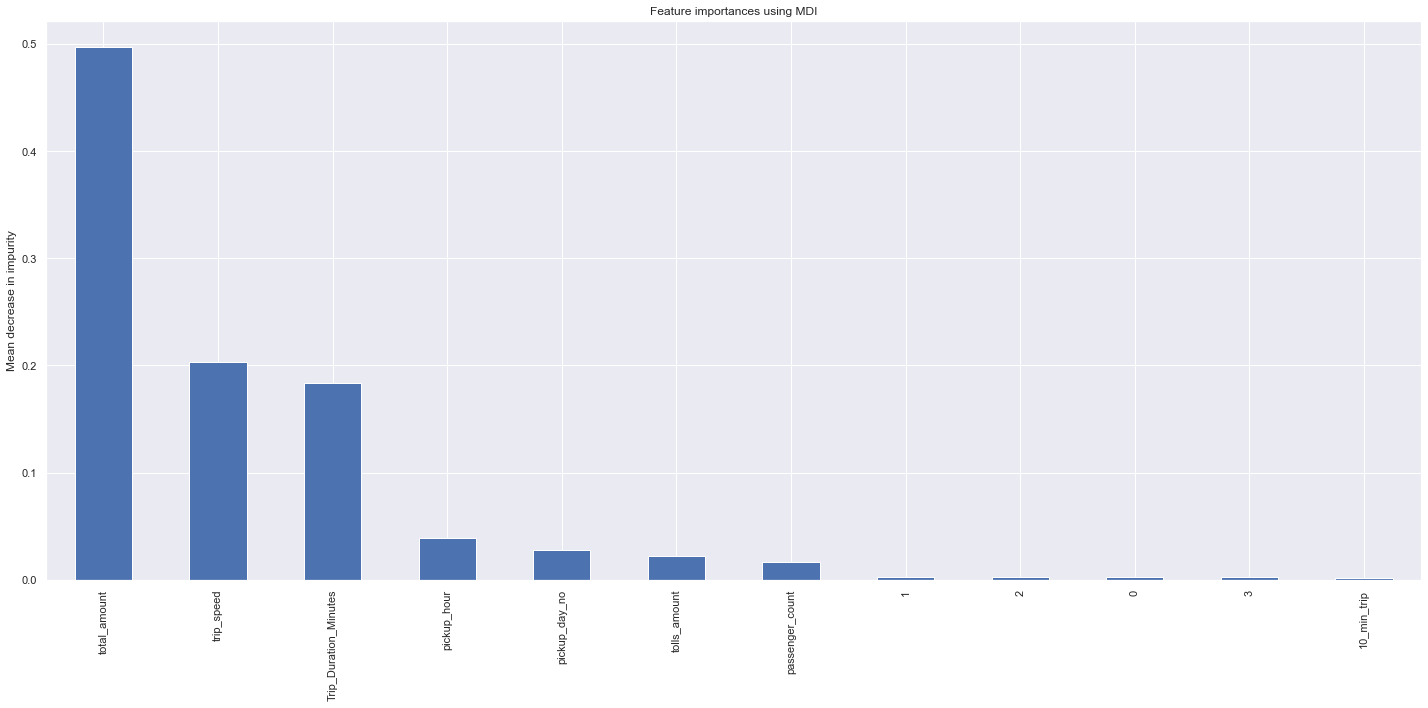

In [122]:
fig, ax = plt.subplots()
feature_imp.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Support Vector Classifier

In [124]:
clf = svm.LinearSVC()

Use linear svc because the dataset is large and training times increase substantially if we use standard svc.

In [125]:
clf.fit(X_train_lr, y_train_lr)

c:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearSVC()

In [126]:
y_pred_svc = clf.predict(X_test_lr)

c:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [127]:
print(classification_report(y_test_lr, y_pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.33      0.47     13423
           1       0.86      0.99      0.92     56942

    accuracy                           0.86     70365
   macro avg       0.85      0.66      0.70     70365
weighted avg       0.86      0.86      0.83     70365



In [131]:
metrics.f1_score(y_test_lr,y_pred_svc,pos_label=0)

0.47365882415992283

In [132]:
metrics.f1_score(y_test_lr,y_pred_random_forest,pos_label=0)

0.9087380118739534

In [134]:
metrics.f1_score(y_test_lr,y_pred,pos_label=0)

0.5468464814439261

In [159]:
result=np.zeros(shape=(1,3))

In [160]:
result[0,0]=metrics.f1_score(y_test_lr,y_pred_random_forest,pos_label=0)
result[0,1]=metrics.f1_score(y_test_lr,y_pred_svc,pos_label=0)
result[0,2]=metrics.f1_score(y_test_lr,y_pred,pos_label=0)
result=pd.DataFrame(result)
result.rename(columns = {0:'Random Forest', 1:'SVC',2:'Logistic Regression'}, inplace = True)
result.rename(index = {0:'F1-Score'}, inplace = True)

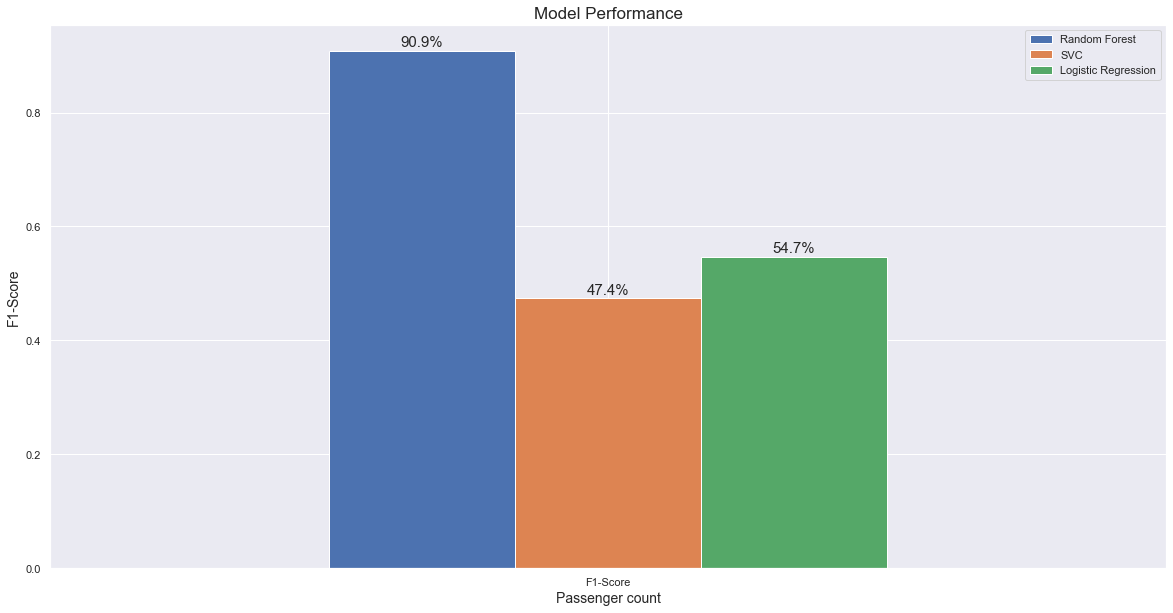

In [167]:
plots=result.plot.bar()
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1%'), #to .0f einai o ari8mos twn dekadikwn, p.x. gia 2 dekadika einai .2f
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Passenger count', size=14)
plt.ylabel("F1-Score", size=14) 
plt.title("Model Performance",size=17)
plt.show()